In [258]:
# Importing Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Data Cleaning and Analysis

In [259]:
# Reading csv file (to DataFrame)
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [260]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [261]:
# Columns with NULL values
null_columns = list(df.columns[df.isnull().any()])
df[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [262]:
# Dropping columns with NULL values more than 750 (Around half of 1460)
df.dropna(axis = 1, thresh = 750, inplace = True)

In [263]:
# Checking amount of NULL values after column removal
null_columns = list(df.columns[df.isnull().any()])
df[null_columns].isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb76333190>]],
      dtype=object)

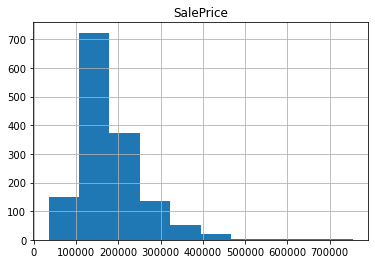

In [264]:
# Distribution of data around SalePrice
df.hist(column = 'SalePrice')

In [265]:
# Numerical (int & float) data type columns for Correlation Analysis
num_var = df.select_dtypes(include = [np.number])
num_var.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [266]:
cont_var = ['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
            'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
            'ScreenPorch', 'PoolArea', 'MiscVal' ]

In [267]:
# Correlation Matrix for observing parameters with good (medium to high) correlation
corr_matrix = df.corr(method = 'pearson')
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [268]:
# Splitting variables into High Correlation Variables and Low Correlation Variables
high_corr_var = []
low_corr_var = []

for i in range(len(corr_matrix)-1):
    if corr_matrix['SalePrice'][i] > 0.3:
        high_corr_var.append(corr_matrix['SalePrice'].index[i])
    else:
        low_corr_var.append(corr_matrix['SalePrice'].index[i])

high_corr_var        

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [269]:
# Dropping Low Correlation Variables to remove redundant data
df.drop(labels = low_corr_var, axis = 1, inplace = True)

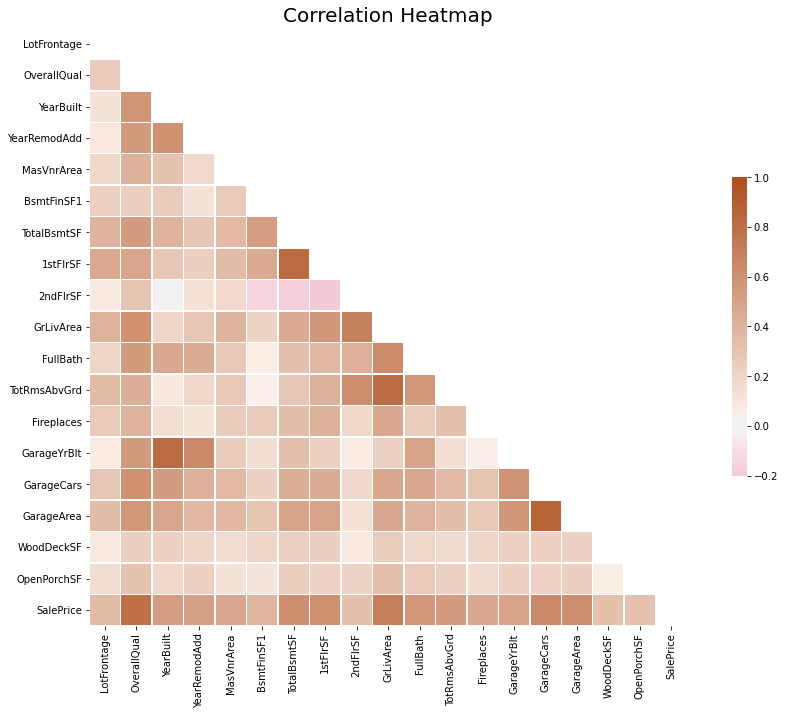

In [270]:
# Generating Correlation matrix
corr = df.corr(method ='pearson')

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generating a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Plotting the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})

plt.title('Correlation Heatmap', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

In [271]:
# Listing Categorical variables
cat_cols = df.select_dtypes(['object']).columns
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [272]:
# Generating Dummy variables for the categorical variables to fit the data
df_dummies = pd.get_dummies(data = df, columns = cat_cols).copy()

In [273]:
# Correlation Matrix for observing categorical parameters with good (medium to high) correlation
corr_matrix_dummies = df_dummies.corr(method = 'pearson')
corr_matrix_dummies['SalePrice'].sort_values(ascending = False)

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
                      ...   
MasVnrType_None    -0.374468
GarageFinish_Unf   -0.410608
BsmtQual_TA        -0.452394
KitchenQual_TA     -0.519298
ExterQual_TA       -0.589044
Name: SalePrice, Length: 258, dtype: float64

In [274]:
# Splitting categorical dummy variables into High Correlation Variables and Low Correlation Variables
high_corr_cat_var = []
low_corr_cat_var = []

for i in range(len(corr_matrix_dummies)-1):
    if corr_matrix_dummies['SalePrice'][i] > 0.3:
        high_corr_cat_var.append(corr_matrix_dummies['SalePrice'].index[i])
    else:
        low_corr_cat_var.append(corr_matrix_dummies['SalePrice'].index[i])

high_corr_cat_var

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Exterior1st_VinylSd',
 'Exterior2nd_VinylSd',
 'MasVnrType_Stone',
 'ExterQual_Ex',
 'ExterQual_Gd',
 'Foundation_PConc',
 'BsmtQual_Ex',
 'BsmtExposure_Gd',
 'BsmtFinType1_GLQ',
 'HeatingQC_Ex',
 'KitchenQual_Ex',
 'KitchenQual_Gd',
 'FireplaceQu_Gd',
 'GarageType_Attchd',
 'GarageFinish_Fin',
 'SaleType_New']

In [275]:
# Generating training dataset with only high correlation (medium to high) variables
df_train = df_dummies[high_corr_cat_var].copy()
df_train

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,BsmtQual_Ex,BsmtExposure_Gd,BsmtFinType1_GLQ,HeatingQC_Ex,KitchenQual_Ex,KitchenQual_Gd,FireplaceQu_Gd,GarageType_Attchd,GarageFinish_Fin,SaleType_New
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,...,0,0,1,1,0,1,0,1,0,0
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,...,0,1,0,1,0,0,0,1,0,0
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,...,0,0,1,1,0,1,0,1,0,0
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,...,0,0,0,0,0,1,1,0,0,0
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,...,0,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,1999,2000,0.0,0,953,953,694,1647,...,0,0,0,1,0,0,0,1,0,0
1456,85.0,6,1978,1988,119.0,790,1542,2073,0,2073,...,0,0,0,0,0,0,0,1,0,0
1457,66.0,7,1941,2006,0.0,275,1152,1188,1152,2340,...,0,0,1,1,0,1,1,1,0,0
1458,68.0,5,1950,1996,0.0,49,1078,1078,0,1078,...,0,0,1,0,0,1,0,1,0,0


In [276]:
# Checking for remaining NULL values in the training dataset
null_columns_final = list(df_train.columns[df_train.isnull().any()])
df_train[null_columns_final].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [277]:
# Replacing NULL values with Median values (Algorithm cannot accept NULL values)
df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].median(), inplace = True) 

In [278]:
# Dropping columns with NULL values which cannot be replaced efficiently
df_train.dropna(axis = 1, inplace = True)

In [279]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OverallQual           1460 non-null   int64  
 1   YearBuilt             1460 non-null   int64  
 2   YearRemodAdd          1460 non-null   int64  
 3   MasVnrArea            1460 non-null   float64
 4   BsmtFinSF1            1460 non-null   int64  
 5   TotalBsmtSF           1460 non-null   int64  
 6   1stFlrSF              1460 non-null   int64  
 7   2ndFlrSF              1460 non-null   int64  
 8   GrLivArea             1460 non-null   int64  
 9   FullBath              1460 non-null   int64  
 10  TotRmsAbvGrd          1460 non-null   int64  
 11  Fireplaces            1460 non-null   int64  
 12  GarageCars            1460 non-null   int64  
 13  GarageArea            1460 non-null   int64  
 14  WoodDeckSF            1460 non-null   int64  
 15  OpenPorchSF          

# Training

In [280]:
# Splitting training dataset into y (Labels aka Answers) and x (Data to be trained upon)
y = np.log(df_train.SalePrice)
x = df_train.drop(['SalePrice'], axis = 1)

In [281]:
# Splitting Data into Training Set and Testing (Dev) Set 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state = 35, test_size = 0.3)

In [282]:
# Fitting the Linear Regression model onto the cleaned data
lrd = linear_model.LinearRegression()
model = lrd.fit(X_train, Y_train)

# Model Evaluation

In [283]:
# Evaluating R Squared and R Mean Squared Error
print('R^2 score is: \n', model.score(X_test, Y_test))

predictions = model.predict(X_test)
print('RMSE is: \n', mean_squared_error(Y_test, predictions))

R^2 score is: 
 0.8717620264861782
RMSE is: 
 0.020650778679660326


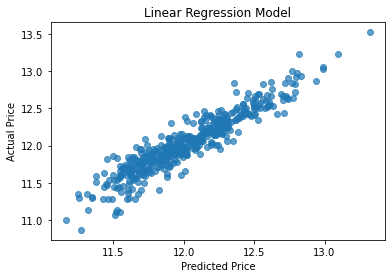

In [284]:
# Plotting Actual Price v/s Predicted Price for the Test (Dev) set
actual_values = Y_test
plt.scatter(predictions, actual_values, alpha = 0.7)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

# Testing

In [285]:
# Reading csv file (to DataFrame)
df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [286]:
# Removing SalePrice from list of columns (Not present in Testing data : Value to be predicted)
final_columns = list(df_train.columns)
final_columns.remove('SalePrice')

In [287]:
# Dropping Low Correlation Variables to remove redundant data
df_test.drop(labels = low_corr_var, axis = 1, inplace = True)

In [288]:
# Generating Dummy variables for the categorical variables
df_dummies_test = pd.get_dummies(data = df_test, columns = cat_cols).copy()

In [289]:
# Removing SalePrice from list of High correlation variables
high_corr_cat_var.remove('SalePrice')

In [290]:
# Extracting only High correlation variables (medium to high) from the dataset
df_final_test = df_dummies_test[high_corr_cat_var].copy()
df_final_test

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,BsmtQual_Ex,BsmtExposure_Gd,BsmtFinType1_GLQ,HeatingQC_Ex,KitchenQual_Ex,KitchenQual_Gd,FireplaceQu_Gd,GarageType_Attchd,GarageFinish_Fin,SaleType_New
0,80.0,5,1961,1961,0.0,468.0,882.0,896,0,896,...,0,0,0,0,0,0,0,1,0,0
1,81.0,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,...,0,0,0,0,0,1,0,1,0,0
2,74.0,5,1997,1998,0.0,791.0,928.0,928,701,1629,...,0,0,1,0,0,0,0,1,1,0
3,78.0,6,1998,1998,20.0,602.0,926.0,926,678,1604,...,0,0,1,1,0,1,1,1,1,0
4,43.0,8,1992,1992,0.0,263.0,1280.0,1280,0,1280,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,4,1970,1970,0.0,0.0,546.0,546,546,1092,...,0,0,0,0,0,0,0,0,0,0
1455,21.0,4,1970,1970,0.0,252.0,546.0,546,546,1092,...,0,0,0,0,0,0,0,0,0,0
1456,160.0,5,1960,1996,0.0,1224.0,1224.0,1224,0,1224,...,0,0,0,1,0,0,0,0,0,0
1457,62.0,5,1992,1992,0.0,337.0,912.0,970,0,970,...,0,0,1,0,0,0,0,0,0,0


In [291]:
# Checking for NULL values within the Test dataset
null_columns_final_test = list(df_final_test.columns[df_final_test.isnull().any()])
df_final_test[null_columns_final_test].isnull().sum()

LotFrontage    227
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
GarageYrBlt     78
GarageCars       1
GarageArea       1
dtype: int64

In [292]:
# Replacing NULL values with Median values (Algorithm cannot accept NULL values)
df_final_test['MasVnrArea'].fillna(df_final_test['MasVnrArea'].median(), inplace = True) 
df_final_test['BsmtFinSF1'].fillna(df_final_test['BsmtFinSF1'].median(), inplace = True) 
df_final_test['TotalBsmtSF'].fillna(df_final_test['TotalBsmtSF'].median(), inplace = True) 
df_final_test['GarageCars'].fillna(df_final_test['GarageCars'].median(), inplace = True) 
df_final_test['GarageArea'].fillna(df_final_test['GarageArea'].median(), inplace = True) 

In [293]:
# Dropping columns with NULL values which cannot be replaced efficiently
df_final_test.dropna(axis = 1, inplace = True)

# Model Predictions

In [296]:
# Making predictions upon the Test data and converting back from Logarithmic form
predictions_submission = model.predict(df_final_test)
final_predictions_submission = np.exp(predictions_submission)

In [297]:
print('Final Submissions :', final_predictions_submission[:5])

Final Submissions : [115812.24429844 145181.90821239 164341.34029946 200575.55039247
 187003.58922989]


In [302]:
# Exporting predictions to submission.csv
submission = pd.DataFrame(columns = ['Id', 'SalePrice'])
df_test = pd.read_csv('test.csv')
submission['Id'] = df_test.Id
submission['SalePrice'] = final_predictions_submission
submission.to_csv('submission.csv', index = False)